In [1]:
import numpy as np
import util


def main(train_path, valid_path, save_path):
    """Problem: Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    x_test, y_test = util.load_dataset(valid_path, add_intercept=True)

    # *** START CODE HERE ***
    # Train a logistic regression classifier
    # Plot decision boundary on top of validation set set
    # Use np.savetxt to save predictions on eval set to save_path
    # *** END CODE HERE ***

In [2]:
class LogisticRegression:
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    
    
    def fit(self, x, y):
       
        def hypothesis(x, theta):
            return 1/(1 + np.exp(-np.dot(x, theta.T)))
        
        def gradient(x, y, theta):
            m = x.shape[0]
            return -1/(m) * np.dot(x.T, y-hypothesis(x,theta))
        
        def hessian(x,theta):
            h_theta_x = np.reshape(hypothesis(x, theta), (-1, 1))
            m = x.shape[0]
            return 1/m * np.dot(x.T, (h_theta_x * (1 - h_theta_x)) * x)

        if self.theta is None: 
            self.theta = np.zeros(x.shape[1])
        
        def next_theta(theta, x, y):
            return theta - np.dot(np.linalg.inv(hessian(x, theta)), gradient(x, y, theta))

        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta


    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
            # *** START CODE HERE ***
        return x @ self.theta >=0
            # *** END CODE HERE ***


0.9632


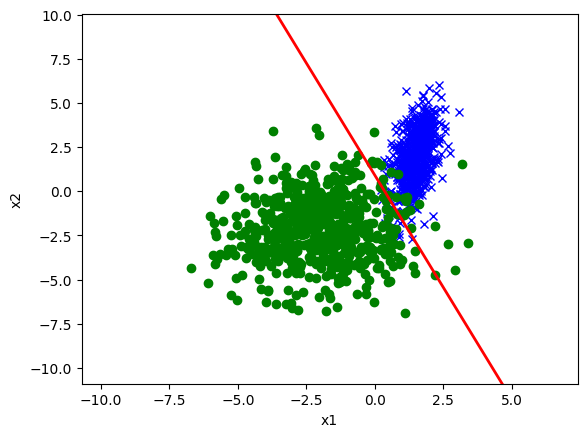

In [3]:
train_path='train.csv'
test_path='test.csv'

x_train, y_train = util.load_dataset('train.csv', add_intercept=True)
_, t_train = util.load_dataset('train.csv', label_col='t')
x_valid, y_valid = util.load_dataset('valid.csv', add_intercept=True)
_, t_valid = util.load_dataset('valid.csv', label_col='t')
x_test, y_test = util.load_dataset('test.csv', add_intercept=True)
_, t_test = util.load_dataset('test.csv', label_col='t')
LR = LogisticRegression()
LR.fit(x_train, t_train)

util.plot(x_train, t_train, theta=LR.theta, save_path="posonly_pred_1.png")
accuracy = np.mean(LR.predict(x_train)==t_train)
print(accuracy)

0.5


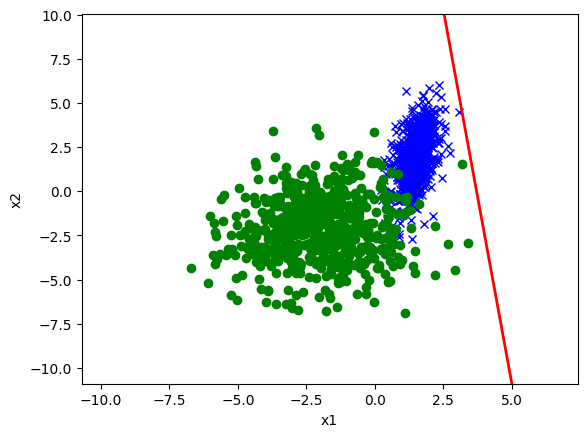

In [4]:
train_path='train.csv'
test_path='test.csv'

x_train, y_train = util.load_dataset(train_path, label_col='y', add_intercept=True)
x_test, y_test = util.load_dataset(test_path, label_col='y', add_intercept=True)

LR = LogisticRegression()
LR.fit(x_train, y_train)

util.plot(x_train, t_train, theta=LR.theta, save_path="posonly_pred_1.png")
accuracy = np.mean(LR.predict(x_train)==t_train)
print(accuracy)

In [5]:
def hypothesis(x, theta):
    return 1/(1 + np.exp(-np.dot(x, theta.T)))


v_plus = x_valid[y_valid==1] #only x's with y==1
alpha = hypothesis(v_plus, LR.theta).mean()

In [6]:
#new predict to set a threshold
def predict(theta, x):
    return hypothesis(x, theta) / alpha>=0.5

theta_prime = LR.theta + np.log(2 / alpha - 1) * np.array([1, 0, 0])

Theta_prime is:  [-0.55096984  0.78596651  0.09282768]
The accuracy on test set is:  0.9444444444444444


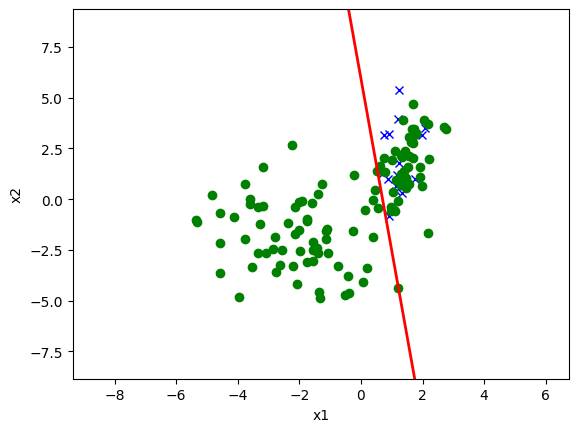

In [7]:
util.plot(x_test, y_test, theta_prime, save_path="posonly_pred_2.png")
print("Theta_prime is: ", theta_prime)
print("The accuracy on test set is: ", np.mean(predict(LR.theta, x_test) == t_test))